In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
data =pd.read_csv('regressiondata.csv')

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
newdata = data.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [6]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
10%,1705.000000,3.010000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
99%,2042.530000,3.768500
max,2050.000000,3.810000


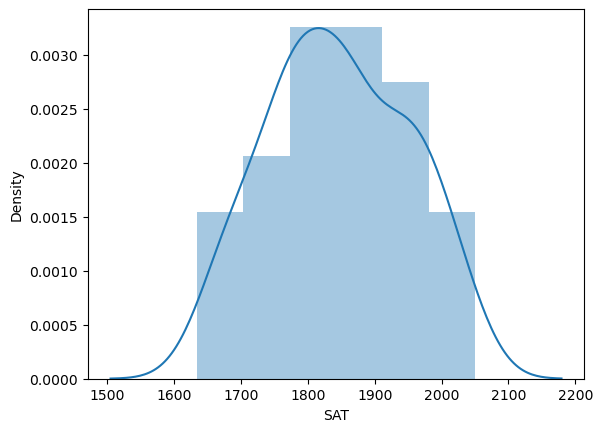

In [7]:
sns.distplot(data['SAT']);

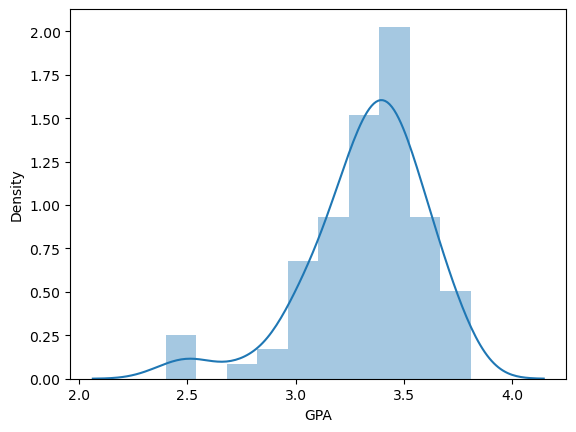

In [8]:
sns.distplot(data['GPA']);

# Concept of Scipy to Calculate R Square and Coef_ & Intercept_

In [9]:
from scipy import stats
res = stats.linregress(data['SAT'],data['GPA'])
res

LinregressResult(slope=0.0016556880500928149, intercept=0.27504029966027854, rvalue=0.6371843648401914, pvalue=7.199518436563902e-11, stderr=0.0002211557670340503, intercept_stderr=0.4087394168543707)

In [10]:
res.slope

0.0016556880500928149

In [11]:
res.intercept

0.27504029966027854

In [12]:
res.rvalue

0.6371843648401914

# Calculating Coorelation [R Square] using Heatmap

In [13]:
data.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


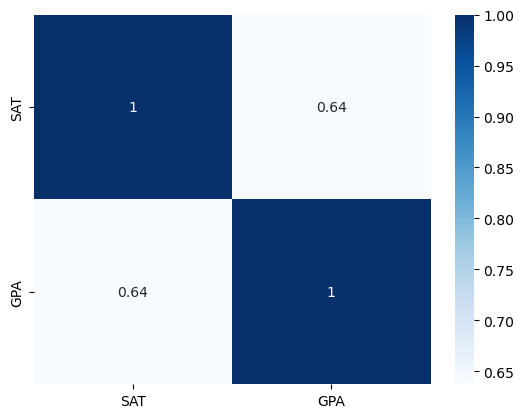

In [14]:
sns.heatmap(data.corr(),annot=True,cbar=True,cmap='Blues');

# Concept of StatsModel to Calculate R Square and Coef_ & Intercept_

In [15]:
import statsmodels.api as sm
x1 = sm.add_constant(data['SAT'])
result = sm.OLS(data['GPA'],x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           7.20e-11
Time:                        23:04:27   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

VIF = 1/(1-R2)

In [17]:
VIF = 1/(1-0.644)
VIF

2.808988764044944